In [2]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime
import time

In [3]:
start_date = "20200101"
end_date = "20230101"

In [4]:
df = pd.DataFrame()
try:
    df = pd.read_pickle("df.pkl")
except:
    for i, ticker in enumerate(stock.get_market_ticker_list()):
        # 과한 비중 부여 방지를 위해 평균 시가총액 1000억 ~ 1조 사이에서만 추출
        평균시가총액 = stock.get_market_cap(start_date, end_date, ticker, "y")['시가총액'].mean()
        if 평균시가총액 < 100_000_000_000 or 평균시가총액 > 1_000_000_000_000: continue

        종목 = stock.get_market_ticker_name(ticker)
        종가 = stock.get_market_ohlcv(start_date, end_date, ticker)['종가']
        if (종가.size != 742): continue # 742 영업일

        종가.name = 종목

        df = 종가 if df.empty \
            else pd.concat([df, 종가], axis=1)
        
        # 주식 30개 추출
        if (isinstance(df, pd.DataFrame) and len(df.columns) >= 30): break
        time.sleep(0.5)

    df.to_pickle("df.pkl")
print(df.head())
print(df.shape)
print("df NaN: ", df.isnull().sum().sum())

            AJ네트웍스  AK홀딩스   BGF     BYC  CJ CGV  CJ4우(전환)  CJ씨푸드    CJ우  \
날짜                                                                        
2020-01-02    5050  34850  5500  236500   21801     70600   2735  45550   
2020-01-03    5100  34950  5560  236500   21548     69800   2715  45200   
2020-01-06    5030  34600  5370  233500   20850     68000   2670  44850   
2020-01-07    5030  35300  5500  233500   21231     68600   2670  44750   
2020-01-08    4935  33750  5290  232000   20312     68000   2480  44000   

            CJ제일제당 우  CR홀딩스  ...  HDC랩스  HDC현대EP  HD현대건설기계  HD현대에너지솔루션  \
날짜                           ...                                         
2020-01-02    107500   8900  ...  11100     5000     31500       16500   
2020-01-03    106000   8900  ...  11400     4965     30850       16200   
2020-01-06    103500   8610  ...  11050     4790     29300       15900   
2020-01-07    104500   8520  ...  11000     4860     29400       17000   
2020-01-08    102500   8270  .

In [5]:
first_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
rebalancing_dates = first_dates
rebalancing_dates[-1].strftime('%Y-%m-%d')

'2023-01-01'

,AJ네트웍스,AK홀딩스,BGF,BYC,CJ CGV,CJ4우(전환),CJ씨푸드,CJ우,CJ제일제당 우,CR홀딩스,...,HDC랩스,HDC현대EP,HD현대건설기계,HD현대에너지솔루션,HD현대일렉트릭,HJ중공업,HL D&I,HLB글로벌,HL홀딩스,HSD엔진
날짜,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.009901,0.002869,0.010909,0.000000,-0.011605,-0.011331,-0.007313,-0.007684,-0.013953,0.000000,...,0.027027,-0.007000,-0.020635,-0.018182,0.000000,0.003953,0.003333,-0.024691,0.006579,-0.004473
2020-01-06,-0.013725,-0.010014,-0.034173,-0.012685,-0.032393,-0.025788,-0.016575,-0.007743,-0.023585,-0.032584,...,-0.030702,-0.035247,-0.050243,-0.018519,-0.031111,-0.032480,-0.013289,-0.020253,-0.008715,-0.001966
2020-01-07,0.000000,0.020231,0.024209,0.000000,0.018273,0.008824,0.000000,-0.002230,0.009662,-0.010453,...,-0.004525,0.014614,0.003413,0.069182,-0.004587,-0.016277,-0.020202,-0.002584,0.021978,-0.006753
2020-01-08,-0.018887,-0.043909,-0.038182,-0.006424,-0.043286,-0.008746,-0.071161,-0.016760,-0.019139,-0.029343,...,-0.040909,-0.052469,-0.054422,0.014706,-0.041475,-0.036194,-0.030928,-0.056995,-0.021505,-0.048725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.025510,-0.002950,-0.013683,0.000000,-0.008466,-0.008163,-0.010753,-0.001976,-0.017391,-0.009938,...,0.011673,-0.018405,-0.001616,-0.052142,-0.008464,-0.008761,-0.024263,-0.035144,-0.003101,-0.038961
2022-12-26,-0.013962,0.000000,-0.006936,0.008219,-0.034073,-0.005487,-0.030797,-0.001980,0.002950,0.002509,...,0.000000,0.006250,0.003236,0.000000,0.000000,-0.001263,-0.014210,-0.033113,-0.004666,-0.001351
2022-12-27,0.067257,0.023669,0.016298,0.016304,0.005809,0.006897,0.011215,0.000000,-0.002941,0.002503,...,0.000000,0.008696,0.000000,0.000000,0.043902,0.006321,0.009009,0.000000,0.015625,-0.023004


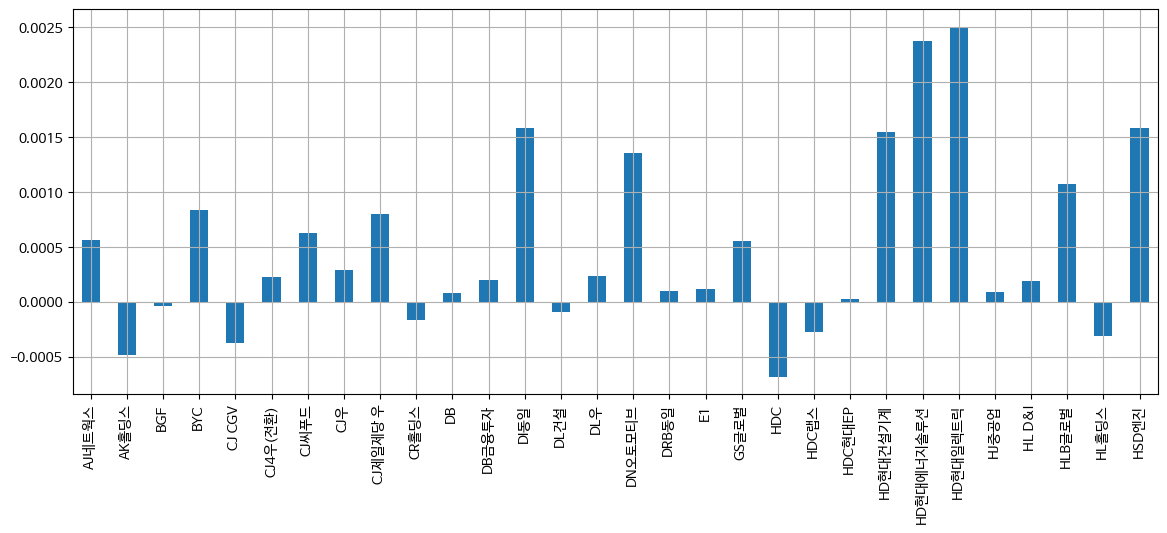

In [6]:
close = df.copy()
close_rtn = close.pct_change()
close_rtn.mean(axis=0).plot(kind='bar', figsize=(14,5), grid=True)
close_rtn

In [10]:
# Define the objective function to maximize the Sharpe ratio (negative for minimization)
def objective(weights, mean_returns):
    portfolio_return = sum(weights * mean_returns)
    portfolio_stddev = (sum((weights * (mean_returns - portfolio_return)) ** 2)) ** 0.5
    sharpe_ratio = -portfolio_return / portfolio_stddev
    return sharpe_ratio

def mvo_weights(selected_stock_rtn):
    date_cnt = selected_stock_rtn.shape[0]
    stock_cnt = selected_stock_rtn.shape[1]
    
    monthly_rtn = selected_stock_rtn.mean(axis=0) * date_cnt
    monthly_cov = selected_stock_rtn.cov() * date_cnt
    
    initial_weights = [1.0 / stock_cnt] * stock_cnt

    # Define optimization constraints (e.g., sum of weights = 1)
    constraints = ({'type': 'eq', 'fun': lambda weights: sum(weights) - 1})

    # Define the bounds for individual stock weights (0 to 1)
    bounds = tuple((-1, 1) for stock in range(stock_cnt))
    
    optimized_portfolio = minimize(objective, initial_weights, (monthly_rtn), method='SLSQP', bounds=bounds, constraints=constraints)
    optimal_weights = optimized_portfolio.x
    return optimal_weights

In [31]:
def portfolio_optimization_backtest(weights_func, close_rtn, rebalancing_dates):
    daily_rtn = pd.Series(dtype = np.float64).reindex_like(close_rtn.iloc[:,0])
    finish_date = rebalancing_dates[-1].strftime('%Y-%m-%d')
    
    portfolio_weights_history = []
    for rd_idx in range(len(rebalancing_dates)-1):
        buy_date = rebalancing_dates[rd_idx]
        sell_date = rebalancing_dates[rd_idx+1]
        
        selected_stock_rtn_1d = close_rtn.loc[buy_date:sell_date,:].iloc[1:]
        sample_period_rtn_1d = close_rtn.loc[:buy_date,:].iloc[-740:-2]

        optimal_weights = weights_func(sample_period_rtn_1d)
        period_rtn_1d = selected_stock_rtn_1d.values @ optimal_weights
        
        daily_rtn.loc[buy_date:sell_date].iloc[1:] = period_rtn_1d.reshape(-1)
        portfolio_weights_history.append((sell_date.strftime('%Y-%m-%d'), optimal_weights))
    
        print(f"{sell_date.strftime('%Y-%m-%d')} / {finish_date}", end='\r')
    
    daily_rtn.dropna(inplace=True)
    return daily_rtn, portfolio_weights_history

def rtn_analysis(daily_rtn):
    cumprod_rtn = (daily_rtn + 1).cumprod()
    cumprod_high = cumprod_rtn.cummax()
    
    annual_rtn = daily_rtn.mean() * 252
    annual_std = daily_rtn.std() * np.sqrt(252)
    sharpe = annual_rtn / annual_std
    dd = cumprod_rtn / cumprod_high - 1
    
    print(f'Annualized mean return       : {annual_rtn:.4f}')
    print(f'Annualized standard deviation: {annual_std:.4f}')
    print(f'Sharpe ratio                 : {sharpe:.4f}')
    print(f'Maximum DrawDown             : {dd.min():.4f}')

def weights_analysis(portfolio_weights_history):
    dates = [entry[0] for entry in portfolio_weights_history]
    weights = [entry[1] for entry in portfolio_weights_history]

    # Create a DataFrame for easier plotting
    weights_df = pd.DataFrame(weights, columns=close.columns, index=dates)

    # Plot the portfolio weights over time
    plt.figure(figsize=(12, 6))
    plt.title('Portfolio Weights Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Weight')
    for stock in close:
        plt.plot(weights_df.index, weights_df[stock], label=stock)

    plt.xticks(rotation=90)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

Annualized mean return       : 0.0968
Annualized standard deviation: 0.4964
Sharpe ratio                 : 0.1951
Maximum DrawDown             : -0.5846


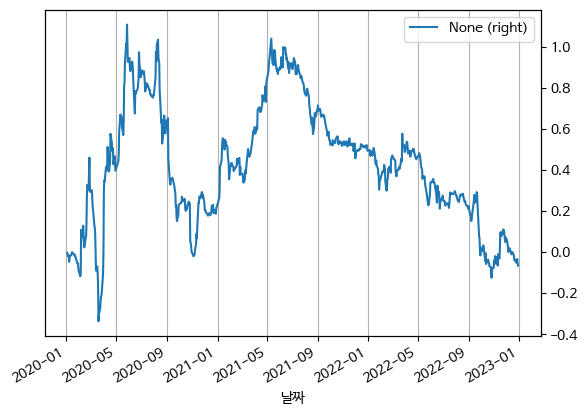

In [19]:
daily_rtn, portfolio_weights_history = portfolio_optimization_backtest(mvo_weights, close_rtn, rebalancing_dates)
rtn_analysis(daily_rtn)
cum_rtn = (daily_rtn + 1).cumprod() - 1
cum_rtn.plot(legend = True, grid=True, secondary_y=True);  

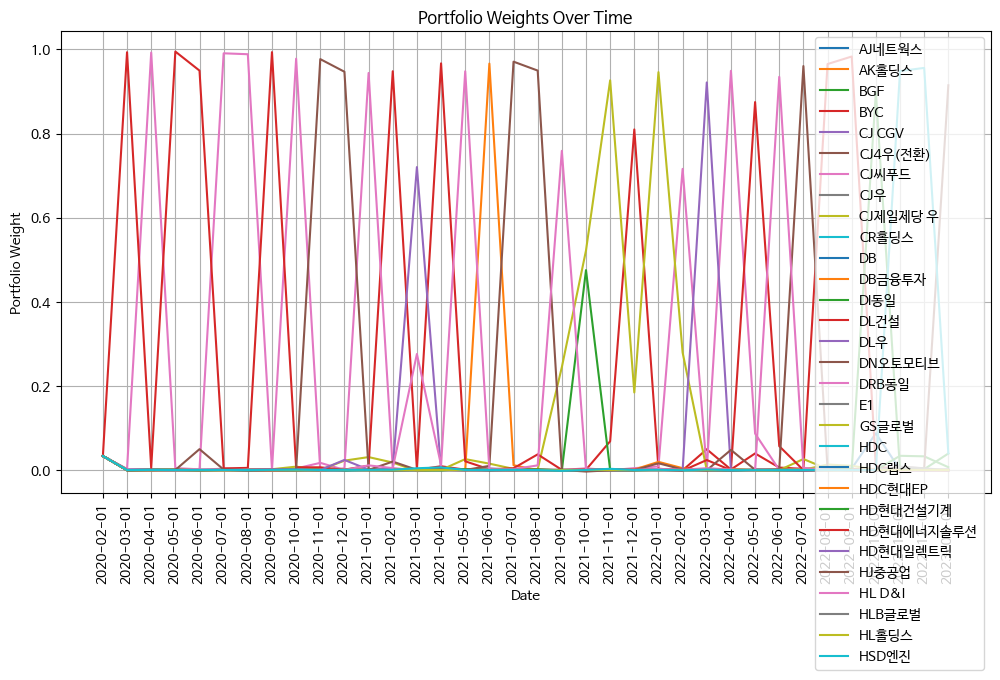

In [32]:
weights_analysis(portfolio_weights_history)